In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 24.9 MB/s 
     |████████████████████████████████| 9.9 MB 45.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/RefinryCo.csv', sep = ",")

In [ ]:
df.head()

,date,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2010-01-02,2030,Saudi Arabia Refineries Co.,SARCO,Energy,49.80,50.25,49.7,49.90,0.10,0.2,76316.0,3809644.65,200.0
1,2010-01-03,2030,Saudi Arabia Refineries Co.,SARCO,Energy,49.90,50.00,49.7,50.00,0.10,0.2,75303.0,3758096.00,151.0
2,2010-01-04,2030,Saudi Arabia Refineries Co.,SARCO,Energy,50.00,50.25,49.7,50.25,0.25,0.5,60310.0,3016818.35,175.0
3,2010-01-05,2030,Saudi Arabia Refineries Co.,SARCO,Energy,50.25,50.75,50.0,50.25,0.00,0.0,135522.0,6834179.00,253.0
4,2010-01-06,2030,Saudi Arabia Refineries Co.,SARCO,Energy,50.25,50.50,50.0,50.00,-0.25,-0.5,93488.0,4689629.50,196.0


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df = df.set_index('date')

In [ ]:
df.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
date,,,,,,,,,,,,,
2010-01-02,2030,Saudi Arabia Refineries Co.,SARCO,Energy,49.80,50.25,49.7,49.90,0.10,0.2,76316.0,3809644.65,200.0
2010-01-03,2030,Saudi Arabia Refineries Co.,SARCO,Energy,49.90,50.00,49.7,50.00,0.10,0.2,75303.0,3758096.00,151.0
2010-01-04,2030,Saudi Arabia Refineries Co.,SARCO,Energy,50.00,50.25,49.7,50.25,0.25,0.5,60310.0,3016818.35,175.0
2010-01-05,2030,Saudi Arabia Refineries Co.,SARCO,Energy,50.25,50.75,50.0,50.25,0.00,0.0,135522.0,6834179.00,253.0
2010-01-06,2030,Saudi Arabia Refineries Co.,SARCO,Energy,50.25,50.50,50.0,50.00,-0.25,-0.5,93488.0,4689629.50,196.0


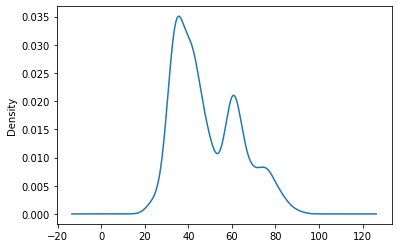

In [ ]:
df_close_price = df['close']
df_close_price.plot(kind='kde')

In [ ]:

close_prices = df_close_price
values = close_prices.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))


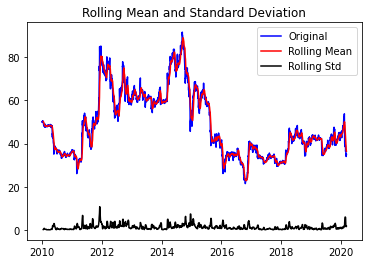

Results of dickey fuller test
Test Statistics                  -2.200673
p-value                           0.206001
No. of lags used                 17.000000
Number of observations used    2524.000000
critical value (1%)              -3.432943
critical value (5%)              -2.862686
critical value (10%)             -2.567380
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close_price)

In [ ]:
split_point = len(df_close_price) - 21
#split_point = len(df_close_price) - 1

In [ ]:
dataset, test = df_close_price[0:split_point], df_close_price[split_point:]

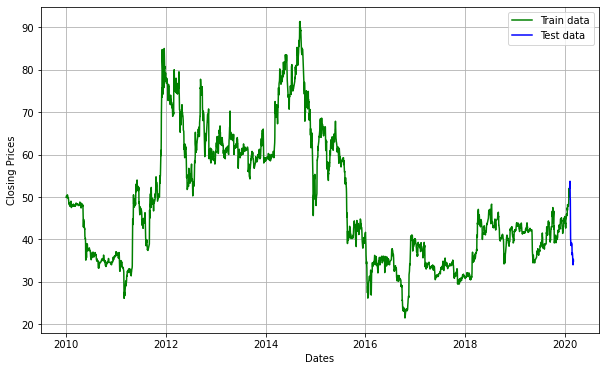

In [ ]:

#test_data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(dataset, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

In [ ]:
#train_data=train_data.to_frame()

NameError: ignored

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8122.871, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8124.304, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8124.319, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8120.871, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8124.101, Time=5.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.581 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2521
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4059.436
Date:                Sat, 10 Dec 2022   AIC                           8120.871
Time:                        13:12:02   BIC                           8126.703
Sample:                             0   HQIC                          8122.988
                               - 2521                                       

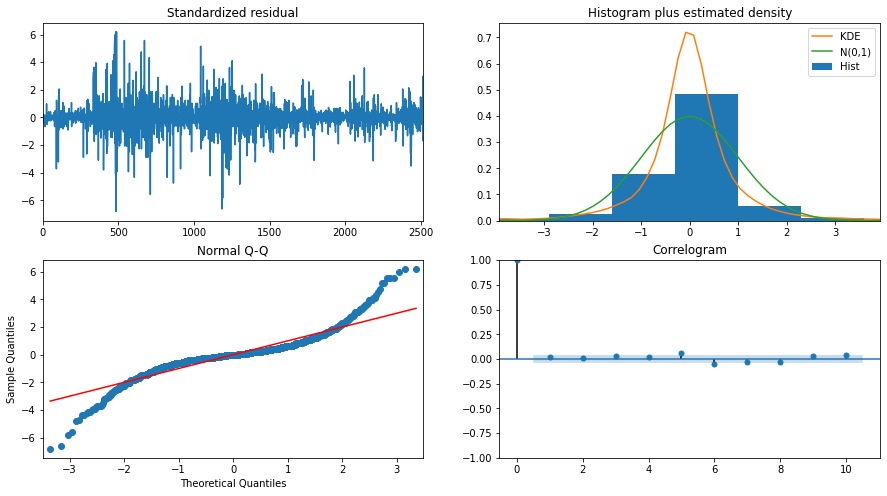

In [ ]:
model_autoARIMA = auto_arima(dataset, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
dftest_data=test.to_frame()

In [ ]:
dftest_data.shape

(21, 1)

In [ ]:
y=model_autoARIMA.predict(n_periods=21)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
x=y.array

In [ ]:
fc_series = pd.Series(x, index=test.index)

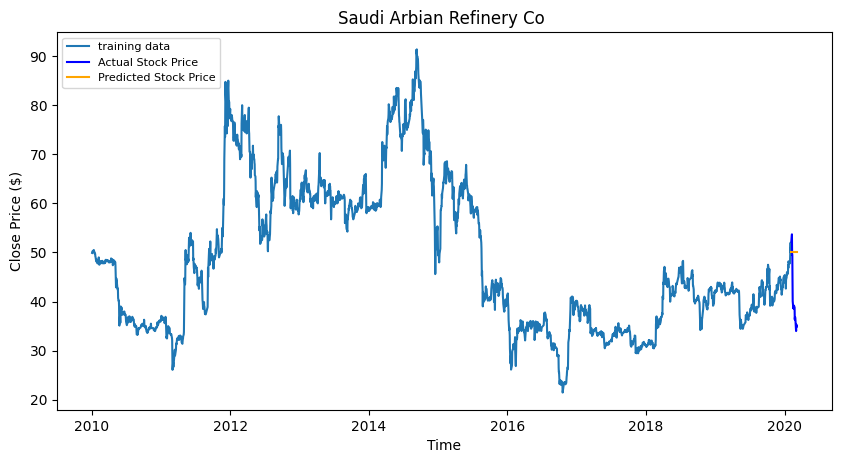

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(dataset, label='training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series,
#                 color='k', alpha=.10)
plt.title('Saudi Arbian Refinery Co ')
plt.xlabel('Time')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(test, fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, x))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(x - test)/np.abs(test))
print('MAPE: '+str(mape))
mape1 = mean_absolute_percentage_error(test, x)
print('MAPE: '+str(mape1))

MSE: 131.65761904761908
MAE: 10.40952380952381
RMSE: 11.474215400088108
MAPE: 0.27943700227657287
MAPE: 0.27943700227657287


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test, x)
print('R squared: '+str(r2))

R squared: -2.7961348879388184
